# Test the Stereo Encoder

In [1]:
import os
import os.path as osp
import numpy as np
import matplotlib.pyplot as plt
import torch

# import stereo network
from im2mesh.encoder.stereo import HdrnAlphaStereo
from typing import Optional, List


## Define utils to visualize dataset

In [2]:
def plot_image_lists(l_images, r_images):
    """
    Plot list of images side by side.

    Args:
        l_images (list): List of left images
        r_images (list): List of right images
    """
    im_dim = 2
    fig, axs = plt.subplots(len(l_images), 2, figsize=(2 * im_dim, len(l_images) * im_dim))
    for i in range(len(l_images)):
        axs[i, 0].imshow(l_images[i])
        axs[i, 1].imshow(r_images[i])
    plt.show()

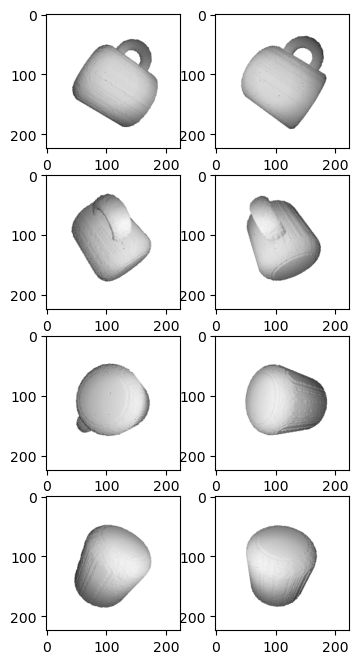

In [3]:
l_plot_image_list = []
r_plot_image_list = []
r_image_list = []
l_image_list = []

toy_data_path = '../../prototypes/'
for i in range(0, 4):
    test_data = np.load(osp.join(toy_data_path, '1a97f3c83016abca21d0de04f408950f', f'pose_{i}.npz'), allow_pickle=True)
    r_image_list.append(test_data['r_image'])
    l_image_list.append(test_data['l_image'])
    l_plot_image_list.append(np.einsum('ijk->jki', test_data['l_image']).astype(int))
    r_plot_image_list.append(np.einsum('ijk->jki', test_data['r_image']).astype(int))
    # print(test_data['pose'])
plot_image_lists(l_plot_image_list, r_plot_image_list)

## Initialize model

In [4]:
class ModelConfig(object):
    model_file: str = None
    model_name: str = None 

    fe_features: int = 16
    fe_internal_features: int = 32
    num_disparities: int = 128
    downsample_factor: int = 8

    checkpoint: Optional[str] = None

hparams = ModelConfig()
model = HdrnAlphaStereo(hparams)

In [8]:
# Note: data shape should be (batch_size, 3, height, width)
l_image_batch = np.stack(l_image_list, axis=0)
r_image_batch = np.stack(r_image_list, axis=0)
l_image_batch_torch = torch.from_numpy(l_image_batch)
r_image_batch_torch = torch.from_numpy(r_image_batch)
print(l_image_batch.shape)
model.forward(l_image_batch_torch, r_image_batch_torch)


(4, 3, 224, 224)
torch.Size([4, 16, 28, 28]) torch.Size([4, 16, 28, 28])
